In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
heights=pd.read_csv('../Machine_Learning/Datasets/data_heights.csv')

In [4]:
heights.head()

,earn,height,sex,ed,age,race
0,50000.0,74.424439,male,16,45,white
1,60000.0,65.537543,female,16,58,white
2,30000.0,63.629198,female,16,29,white
3,50000.0,63.108562,female,16,91,other
4,51000.0,63.402484,female,17,39,white


In [5]:
heights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192 entries, 0 to 1191
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   earn    1192 non-null   float64
 1   height  1192 non-null   float64
 2   sex     1192 non-null   object 
 3   ed      1192 non-null   int64  
 4   age     1192 non-null   int64  
 5   race    1192 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 56.0+ KB


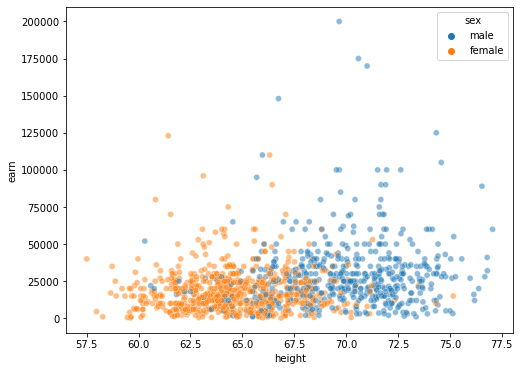

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=heights,y='earn',x='height',hue='sex',alpha=0.5)
plt.show()

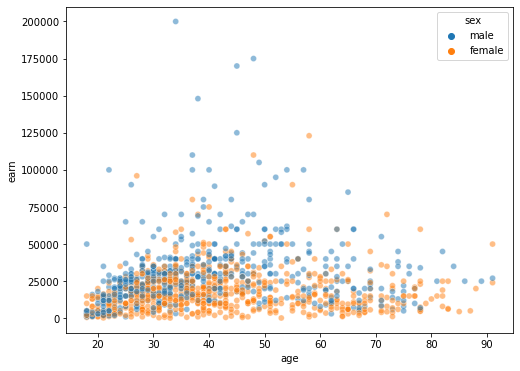

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=heights,y='earn',x='age',hue='sex',alpha=0.5)
plt.show()

<Figure size 576x432 with 0 Axes>

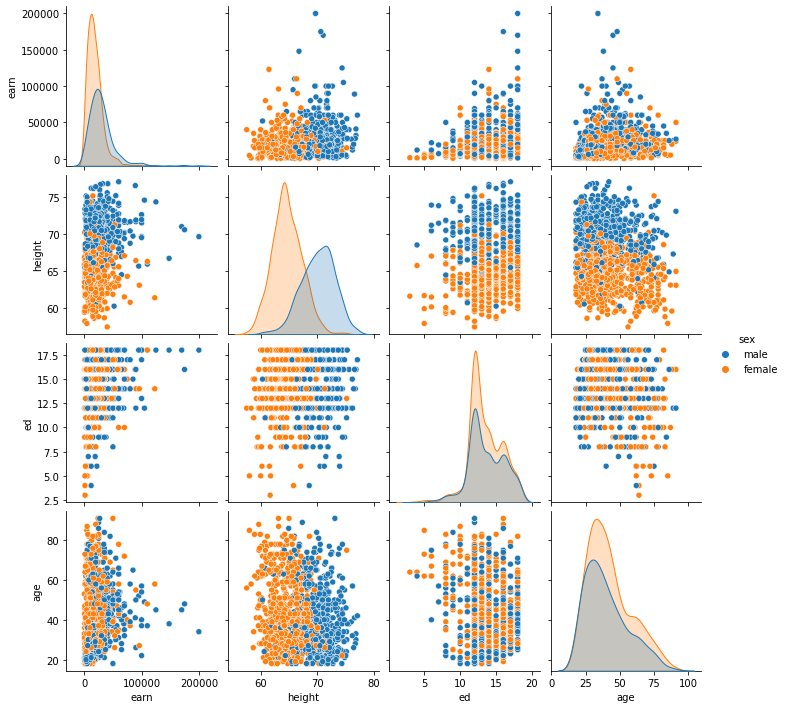

In [8]:
plt.figure(figsize=(8,6))
sns.pairplot(data=heights,hue='sex')
plt.show()

<AxesSubplot:>

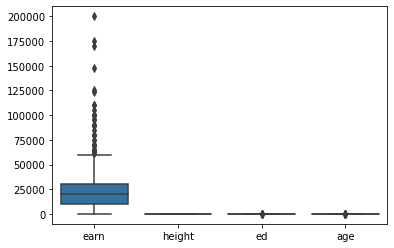

In [9]:
sns.boxplot(data=heights)

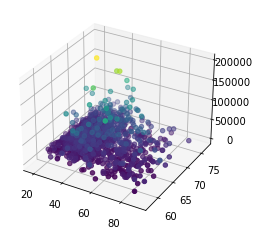

In [10]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(heights['age'],heights['height'],heights['earn'],c=heights['earn'])

In [11]:
#label Encoding
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
heights['sex']=label.fit_transform(heights['sex'])
heights['race']=label.fit_transform(heights['race'])

In [12]:
heights.head()

,earn,height,sex,ed,age,race
0,50000.0,74.424439,1,16,45,3
1,60000.0,65.537543,0,16,58,3
2,30000.0,63.629198,0,16,29,3
3,50000.0,63.108562,0,16,91,2
4,51000.0,63.402484,0,17,39,3


In [13]:
heights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192 entries, 0 to 1191
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   earn    1192 non-null   float64
 1   height  1192 non-null   float64
 2   sex     1192 non-null   int32  
 3   ed      1192 non-null   int64  
 4   age     1192 non-null   int64  
 5   race    1192 non-null   int32  
dtypes: float64(2), int32(2), int64(2)
memory usage: 46.7 KB


In [14]:
heights.corr()

,earn,height,sex,ed,age,race
earn,1.000000,0.241848,0.292102,0.339977,0.081003,0.082517
height,0.241848,1.000000,0.699253,0.098408,-0.136515,0.060039
sex,0.292102,0.699253,1.000000,0.032551,-0.064767,0.012168
ed,0.339977,0.098408,0.032551,1.000000,-0.132069,0.053439
age,0.081003,-0.136515,-0.064767,-0.132069,1.000000,0.050458
race,0.082517,0.060039,0.012168,0.053439,0.050458,1.000000


## #Multi-logesticRegression Model

In [15]:
X=heights[['earn','height','sex','ed','age']].values
y=heights['race'].values

In [16]:
heights['race'].value_counts()

3    989
0    112
1     66
2     25
Name: race, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.3)

In [18]:
#preprocessing and feature scaling
from sklearn.preprocessing import StandardScaler
std_sclar=StandardScaler()
sclar_Xtrain=std_sclar.fit_transform(X_train)
sclar_Xtest=std_sclar.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression
mlog_model=LogisticRegression()
mlog_model.fit(sclar_Xtrain,y_train)

ylog_pred=mlog_model.predict(sclar_Xtest)

## #Model performace and Accuracy

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve

In [21]:
#Model Accuracy
accuracy_score(y_test,ylog_pred)

0.8379888268156425

In [24]:
#confusion_Matrixabs
confusion_matrix(y_test,ylog_pred)

array([[  0,   0,   0,  32],
       [  0,   0,   0,  17],
       [  0,   0,   0,   9],
       [  0,   0,   0, 300]], dtype=int64)

In [25]:
#classification report
print(classification_report(y_test,ylog_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.00      0.00      0.00        17
           2       0.00      0.00      0.00         9
           3       0.84      1.00      0.91       300

    accuracy                           0.84       358
   macro avg       0.21      0.25      0.23       358
weighted avg       0.70      0.84      0.76       358



C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


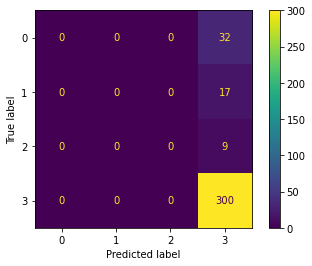

In [26]:
#plot_confusion_matrix
plot_confusion_matrix(mlog_model,sclar_Xtest,y_test)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(heights['age'],heights['height'],heights['earn'],c=heights['race'])

## #Performance Evaluation Using GridSearchCV

In [ ]:
## Performance testing
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
log_model1=LogisticRegression(solver='saga',multi_class='ovr',max_iter=1000)


In [ ]:
penalty=['l1','l2','elasticnet']
C=np.logspace(0,10,10)
l1_ratio=np.linspace(1,100,20)
grid_model=GridSearchCV(log_model1,param_grid={'C':C,'penalty':penalty,"l1_ratio":l1_ratio})
grid_model.fit(sclar_Xtrain,y_train)


In [ ]:
grid_model.best_params_

In [ ]:
y_gridpredict=grid_model.predict(sclar_Xtest)
accuracy_score(y_test,y_gridpredict)

## #removing some features we will see the performance

In [ ]:
X=heights[['earn','height','sex','age']].values
y=heights['race'].values


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.3)

In [ ]:
#preprocessing and feature scaling
from sklearn.preprocessing import StandardScaler
std_sclar=StandardScaler()
sclar_xtrain=std_sclar.fit_transform(x_train)
sclar_xtest=std_sclar.transform(x_test)

In [31]:
from sklearn.linear_model import LogisticRegression
mlog_model=LogisticRegression()
mlog_model.fit(sclar_xtrain,y_train)

ylog_pred=mlog_model.predict(sclar_xtest)

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve

In [33]:
accuracy_score(y_test,ylog_pred)

0.8379888268156425